In [1]:
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Input Images')

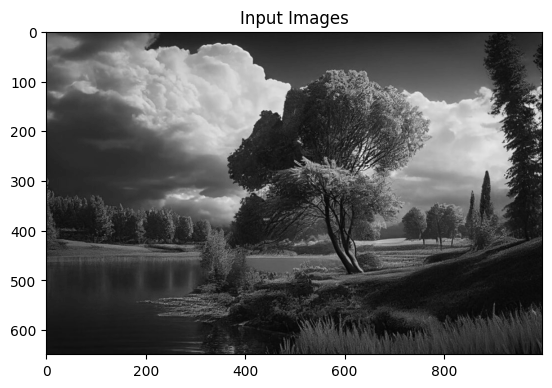

In [2]:

# Load an example image
image_path = 'image/nature.jpg'  # Replace with the path to your image
original_image = plt.imread(image_path)
gray_image = np.mean(original_image, axis=-1)
plt.imshow(gray_image, cmap='gray')
plt.title('Input Images')

In [3]:
# Define the Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

In [4]:
# Get the dimensions of the image and the kernel
image_height, image_width = gray_image.shape
kernel_size = laplacian_kernel.shape[0]


# Initialize an empty result array
laplacian_result = np.zeros_like(gray_image, dtype=np.float64)

# # Extract the local region around the pixel
# p,q = 4,7
# local_region = gray_image[p - 1:p + 2, q - 1:q + 2]

# print(local_region)

# print(local_region * laplacian_kernel)

# # Perform element-wise multiplication with the Laplacian kernel
# convolution_result = np.sum(local_region * laplacian_kernel)
# print(convolution_result)


# Iterate over each pixel in the image
for i in range(1, image_height - 1):
    for j in range(1, image_width - 1):
        # Extract the local region around the pixel
        local_region = gray_image[i - 1:i + 2, j - 1:j + 2]

        # Perform element-wise multiplication with the Laplacian kernel
        convolution_result = np.sum(local_region * laplacian_kernel)

        # Store the result in the Laplacian result array
        laplacian_result[i, j] = (convolution_result+2)*(255//4)

print('Max : ',np.max(laplacian_result,),' Min : ', np.min(laplacian_result))
# print(laplacian_result)

# Ensure the result is within the valid intensity range
laplacian_result = np.clip(laplacian_result, 0, 255)
print('Max : ',np.max(laplacian_result,),' Min : ', np.min(laplacian_result))


Max :  24402.0  Min :  -22113.000000000004
Max :  255.0  Min :  0.0


Text(0.5, 1.0, 'Laplacian Transformed Image')

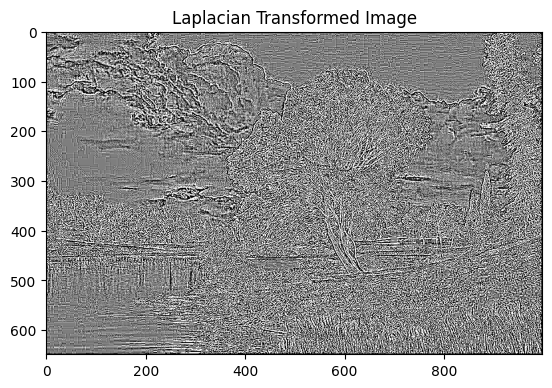

In [5]:
plt.imshow(laplacian_result, cmap='gray')
plt.title('Laplacian Transformed Image')

# Line Detection

(649, 998, 3)


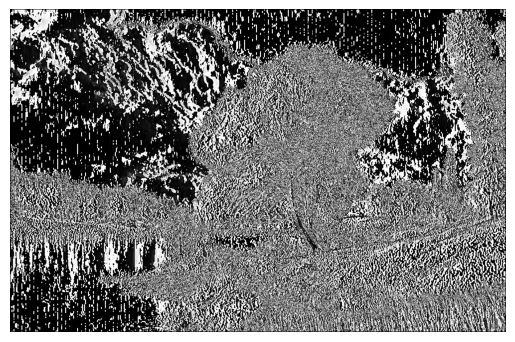

In [10]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('image/nature.jpg')
print(img.shape)
img = np.mean(img, axis=-1)
# line detection using sobel filter
# add padding to image
# padded_img = add_padding(img, 1)
# sobel filter
sobel_filter_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
# convolution
img_height, img_width = img.shape
new_img = np.zeros((img_height, img_width), dtype=np.uint8)
for i in range(1,img_height -1):
    for j in range(1,img_width - 1):
        new_img[i, j] = np.sum(sobel_filter_x * img[i-1:i + 2, j-1:j + 2])

plt.imshow(new_img, cmap='gray')
plt.axis('off')
plt.show()